In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [92]:
plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'figure.titlesize': 16
})

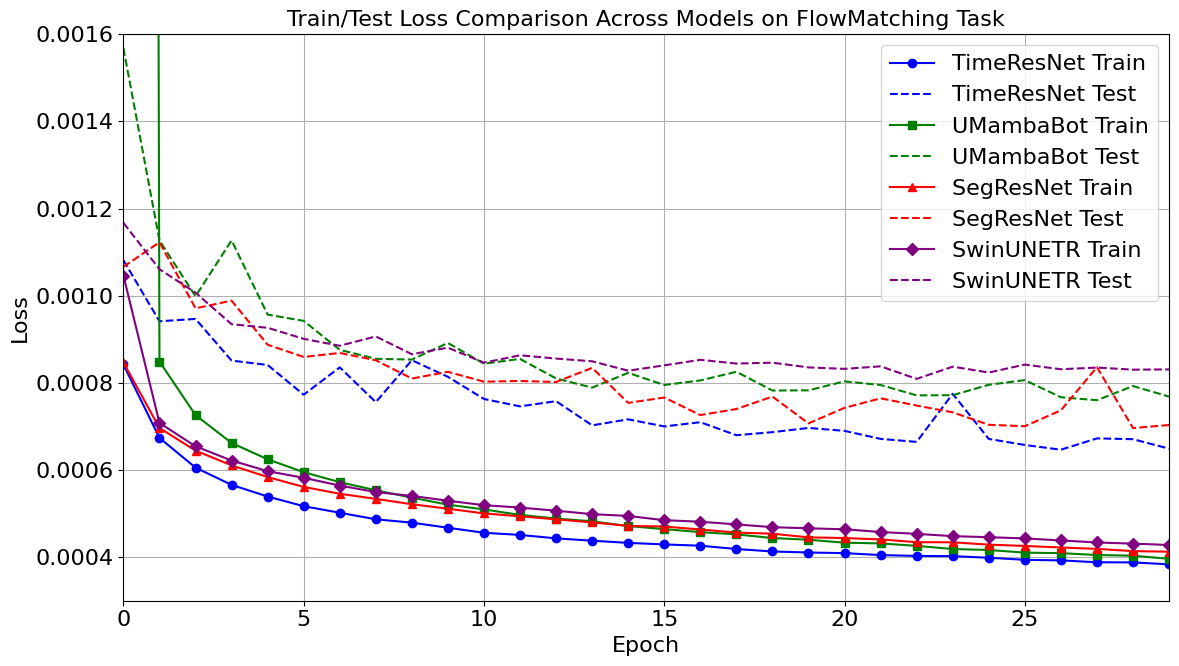

In [93]:
import json
import matplotlib.pyplot as plt
import os

model_files = [
    'run_lemon-shape-1_model.json',
    'run_volcanic-dragon-2_model.json',
    'run_vivid-lion-3_model.json',
    'run_royal-breeze-5_model.json',
]
model_labels = ["TimeResNet", "UMambaBot", "SegResNet", "SwinUNETR"]
colors = ['blue', 'green', 'red', 'purple']
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(12, 7))

for i, file in enumerate(model_files):
    with open(f"./logs/{file}", "r") as f:
        data = [json.loads(line) for line in f]
    epochs = sorted(set(item["Epoch"] for item in data))
    train_loss = [item["Train loss"] for item in data if "Train loss" in item]
    test_loss = [item["Test loss"] for item in data if "Test loss" in item]

    plt.plot(epochs, train_loss, label=f"{model_labels[i]} Train", color=colors[i], marker=markers[i])
    plt.plot(epochs, test_loss, linestyle='--', label=f"{model_labels[i]} Test", color=colors[i])

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train/Test Loss Comparison Across Models on FlowMatching Task")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 29)
plt.ylim(0.0003, 0.0016)
plt.savefig("flow_loss_plot.pdf", bbox_inches='tight')
plt.show()

In [13]:
'./logs/run_royal-breeze-5_model.json'

In [25]:
import torch
model_names = [
    'run_lemon-shape-1_model_best.pth',
    'run_volcanic-dragon-2_model_best.pth',
    'run_vivid-lion-3_model_best.pth',
    'run_royal-breeze-5_model_best.pth',
]
for model_name in model_names:
    check = torch.load(f"{path_check}/{model_name}", weights_only=False)
    print(model_name, check['config']['hyperparams']['net_name'])

run_lemon-shape-1_model_best.pth FlowMatchingModel
run_volcanic-dragon-2_model_best.pth UMambaBot
run_vivid-lion-3_model_best.pth SegResNet
run_royal-breeze-5_model_best.pth SwinUNETR


In [26]:
import torch
model_names = [
    'run_ancient-brook-1_model_best.pth',
    'run_sandy-moon-3_model_best.pth',
    'run_grievous-senate-4_model_best.pth',
    'run_ancient-bantha-5_model_best.pth'
]

path_check = './checkpoint'
statistics = {}
for model_name in model_names:
    check = torch.load(f"{path_check}/{model_name}", weights_only=False)
    print(model_name, check['config']['hyperparams']['net_name'])

run_ancient-brook-1_model_best.pth UNet
run_sandy-moon-3_model_best.pth SegResNet
run_grievous-senate-4_model_best.pth SwinUNETR
run_ancient-bantha-5_model_best.pth UMambaBot


In [ ]:
run_ancient-brook-1_model_best.pth UNet
run_sandy-moon-3_model_best.pth SegResNet
run_grievous-senate-4_model_best.pth SwinUNETR
run_ancient-bantha-5_model_best.pth UMambaBot

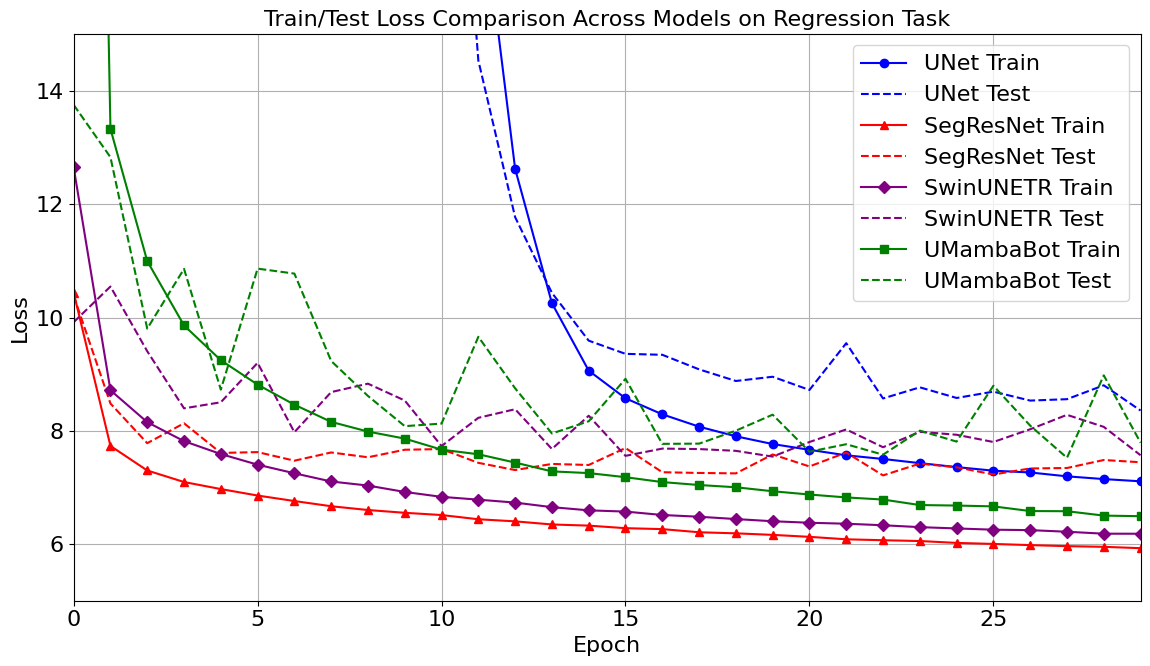

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import json

model_names = [
    'run_ancient-brook-1_model.json',
    'run_sandy-moon-3_model.json',
    'run_grievous-senate-4_model.json',
    'run_ancient-bantha-5_model.json'
]
model_labels = ["UNet", "SegResNet", "SwinUNETR", "UMambaBot"]
colors = ['blue', 'red',  'purple', 'green']
markers = ['o', '^', 'D', 's']

plt.figure(figsize=(12, 7))

for i, file in enumerate(model_names):
    with open(f"./logs/{file}", "r") as f:
        data = [json.loads(line) for line in f]
    epochs = sorted(set(item["Epoch"] for item in data))
    train_loss = 1000*np.array([item["Train loss"] for item in data if "Train loss" in item])
    test_loss = 1000*np.array([item["Test loss"] for item in data if "Test loss" in item])

    plt.plot(epochs, train_loss, label=f"{model_labels[i]} Train", color=colors[i], marker=markers[i])
    plt.plot(epochs, test_loss, linestyle='--', label=f"{model_labels[i]} Test", color=colors[i])

plt.xlabel("Epoch")
plt.ylabel(r"Loss")
plt.title("Train/Test Loss Comparison Across Models on Regression Task")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(0, 29)
plt.ylim(5., 15.)
plt.savefig("reg_loss_plot.pdf", bbox_inches='tight')
plt.show()

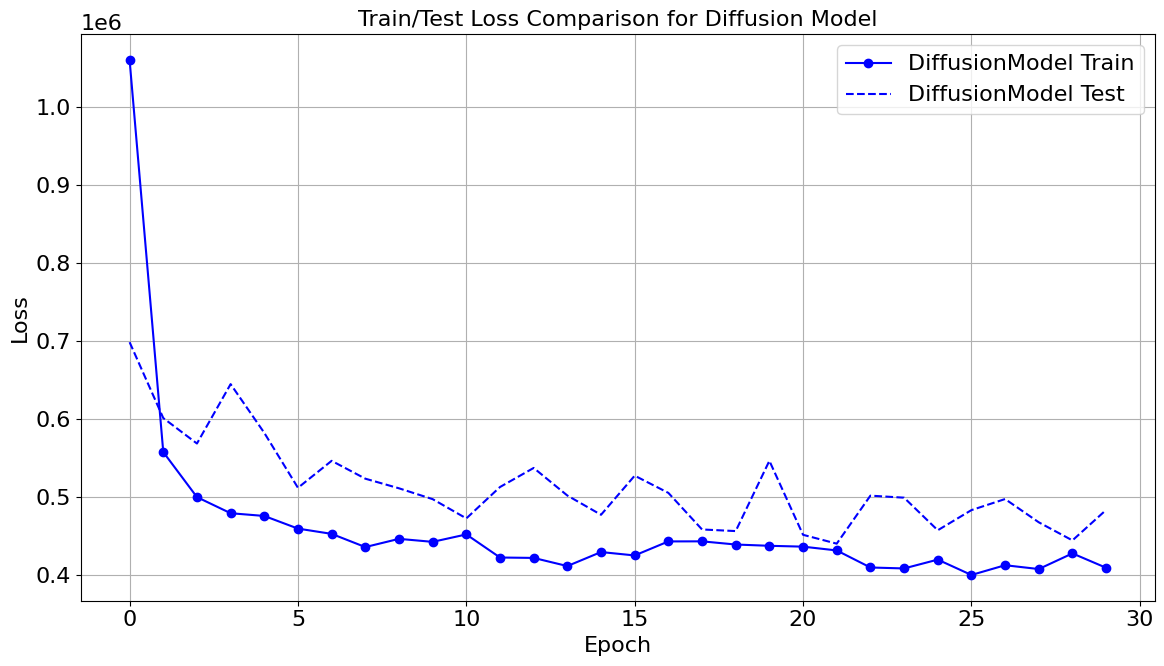

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import json

model_names = [
    'run_holographic-midichlorian-1_model.json',
]
model_labels = ["DiffusionModel"]
colors = ['blue']
markers = ['o']

plt.figure(figsize=(12, 7))

for i, file in enumerate(model_names):
    with open(f"./logs/{file}", "r") as f:
        data = [json.loads(line) for line in f]
    epochs = sorted(set(item["Epoch"] for item in data))
    train_loss = 1000 * np.array([item["Train loss"] for item in data if "Train loss" in item])
    test_loss = 1000 * np.array([item["Test loss"] for item in data if "Test loss" in item])

    plt.plot(epochs, train_loss, label=f"{model_labels[i]} Train", color=colors[i], marker=markers[i])
    plt.plot(epochs, test_loss, linestyle='--', label=f"{model_labels[i]} Test", color=colors[i])

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train/Test Loss Comparison for Diffusion Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("dif_loss_plot.pdf", bbox_inches='tight')
plt.show()

In [78]:
import diffusion_trainer
import reg_trainer
import flow_matching

In [85]:
model_names = [
    'run_ancient-brook-1_model_best.pth',
    'run_sandy-moon-3_model_best.pth',
    'run_grievous-senate-4_model_best.pth',
    'run_ancient-bantha-5_model_best.pth'
]
path_check = './checkpoint'
statistics = {}
for model_name in model_names:
    check = torch.load(f"{path_check}/{model_name}", weights_only=False)

    net = reg_trainer.get_net(check['config']['hyperparams']['net_name'], check['config']['net'])
    net.load_state_dict(check['net'])
    total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
    print(check['config']['hyperparams']['net_name'], f"Количество обучаемых параметров: {total_params/10**6}")

UNet Количество обучаемых параметров: 104.226784
SegResNet Количество обучаемых параметров: 214.055169
SwinUNETR Количество обучаемых параметров: 120.069937
UMambaBot Количество обучаемых параметров: 141.566086


In [86]:
model_names = [
    'run_lemon-shape-1_model_best.pth',
    'run_volcanic-dragon-2_model_best.pth',
    'run_vivid-lion-3_model_best.pth',
    'run_royal-breeze-5_model_best.pth',
]
path_check = './checkpoint'
statistics = {}
for model_name in model_names:
    check = torch.load(f"{path_check}/{model_name}", weights_only=False)

    net = flow_matching.get_net(check['config']['hyperparams']['net_name'], check['config']['net'])
    net.load_state_dict(check['net'])
    total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
    print(check['config']['hyperparams']['net_name'], f"Количество обучаемых параметров: {total_params/10**6}")

FlowMatchingModel Количество обучаемых параметров: 124.634753
UMambaBot Количество обучаемых параметров: 141.567366
SegResNet Количество обучаемых параметров: 214.055745
SwinUNETR Количество обучаемых параметров: 120.071281


In [88]:
model_names = [
    'run_holographic-midichlorian-1_model_best.pth',
]
path_check = './checkpoint'
statistics = {}
for model_name in model_names:
    check = torch.load(f"{path_check}/{model_name}", weights_only=False)

    net = diffusion_trainer.get_net(check['config']['hyperparams']['net_name'], check['config']['net'])
    net.load_state_dict(check['net'])
    total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
    print(check['config']['hyperparams']['net_name'], f"Количество обучаемых параметров: {total_params/10**6}")

DiffusionModel Количество обучаемых параметров: 108.411521
